In [1]:
import json
from collections import Counter, defaultdict
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import nltk
import networkx as nx
from hashlib import sha256
import seaborn as sns
import pandas as pd

In [2]:
# !py -m pip install LIBs
# !py -m pip install --upgrade LIBs

In [3]:
# nltk.download('stopwords')

In [4]:
with open("data/miguel-milhao-27.json") as inf:
    comments = json.load(inf)

In [5]:
f"Got {len(comments)} direct comments"

'Got 288 direct comments'

In [6]:
with open("data/post-miguel-milhao-27.json") as inf:
    ORIGINAL_COMMENT = json.load(inf)

In [7]:
ORIGINAL_COMMENT["text"], f'{len(ORIGINAL_COMMENT["reactions"])} reactions'

('It seems that unborn babies got their rights back in USA! Nature is healing!👍🤌👍',
 '347 reactions')

In [8]:
def clean_final_text(text):
    text = text.lower()
    text = text.replace("miguel milhão", "")
    return text

In [9]:
manual_stopwords = set(["nao", "ter", "sim", "porque"])
stopwords = STOPWORDS | set(nltk.corpus.stopwords.words('portuguese')) | manual_stopwords


def do_word_cloud(text, custom_stopwords=[], save_as=None):
    wordcloud = WordCloud(width=1600, height=1200,
                          background_color='black',
                          stopwords=stopwords | set(custom_stopwords),
                          min_font_size=10).generate(clean_final_text(text))
    # plot the WordCloud image
    plt.figure(figsize=(16, 12), facecolor=None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()
    if save_as: 
        wordcloud.to_file("media/" + save_as)

In [10]:
# try to get organisation and job title from job_title field
def get_job_org(job_title):
    separators = [" at ", "@", " na ", " no ", " in ", " em ", " | ", " do ", " da ", " / ", "|"]
    title, org = job_title.strip().lower(), ""
    for s in separators:
        parts = job_title.split(s)
        if len(parts) >= 2:
            title, org = parts[0].strip().lower(), " ".join(parts[1:]).strip().lower()
            break
    return title, org
assert ("software engineer", "guli") == get_job_org("software engineer at guli")
assert ("software engineer", "guli") == get_job_org("software engineer @guli")

In [11]:
def clean_name(name):
    return name.replace("🔶", "").replace("📱", "").replace("⚡️", "").replace("🚀", "").replace("◾", "").strip().lower()
def clean_url(url):
    return url.split("?")[0].strip()

In [12]:
# get all names seen
names = []
for c in comments:
    names.append(clean_name(c["name"]))
    for r in c["reactions"]:
        names.append(clean_name(r["name"]))
    for r in c["replies"]:
        names.append(clean_name(r["name"]))
        for rr in r["reactions"]:
            names.append(clean_name(rr["name"]))
names = list(set(names))
for r in ORIGINAL_COMMENT["reactions"]:
    names.append(clean_name(r["name"]))
print(len(names))

2990


In [13]:
# this code is used to check that no names were missing, all were separated manually
# classify names as male vs female
other_names = ["equipa", "ndrina", "vet", "dhunnah", "ginha", "imovideo", "ashza"]
female_names = ["maria", "ana", "catarina", "joana", "susana", "rita", "patrícia", "francisca", "mafalda", "alexandra", "sara", "𝚂𝚊𝚛𝚊", "sofia", "marta", "rute", "marlene", "katy", "inês", "eva", "filipa", "carolina", "teresa", "anna", "beatriz", "diana", "constança", "morgane", "margarida", "vanessa", "serena", "mariana", "denise", "daniela", "sandra", "aline", "tânia", "tania", "andreia", "cristina", "raquel", "brenda", "janine", "claudia", "alice", "carla", "milene", "lara", "isabel", "monica", "martyna", "débora", "sónia", "katrin", "cat", "tatiana", "fabiana", "elsa", "catherine", "soraia", "angela", "rachel", "jessica", "piedade", "bárbara", "paula", "marina", "lúcia", "cátia", "helena", "isabela", "cecilia", "jody", "ligia", "letícia", "ceira", "telma", "silvia", "jearina", "natacha", "rosana", "simone", "márcia", "marrieni", "vitória", "zaína", "anaïs", "luana", "irina", "íris", "alejandra", "carina", "salomé", "lídia", "dalila", "fátima", "geann", "ola", "ornela", "jacqueline", "evelina", "corália", "graça", "brigitte", "clara", "eliana", "lisa", "flávia", "rokaya", "juliana", "angelina", "catalina", "catherina", "irene", "marisa", "célia", "sarah", "alena", "stefania", "ângela", "tamara", "barbara", "ânia", "rafaela", "assunção", "carmo", "gisela", "apeksha", "liana", "ariadna", "dipali", "valéria", "jéssica", "alex julian", "vera", "esperanza", "isabella", "bianca", "patricia", "anabela", "iara", "courtney", "tarcila", "sophie", "liliana", "carlota", "sílvia", "renata", "soraya", "alesia", "ines", "fábia", "tabita", "isa", "madelen", "lurdes", "nádia", "filomena", "helen", "eunice", "janice", "ivana", "antonia", "linh", "florinda", "jackeline", "evelyn", "miriam", "adriana", "sonia", "bettina", "merícia", "jania", "luísa", "lucie","rosa","rebecca","cheila","mónica","amélia","alicia", "aldara", "ingrett","madalena","giullia","gabriela","judite","mélanie","bruna","chaimaa", "hélia","awja","lucinda","núria","rosário","cláudia","federica","lilianaⲗ", "evelyne", "eleni","nicole","wendy","anaísa","carminho", "catia", "gabriela-elena", "bebiana","augusta", "solângela", "eduarda","cheryl", "tiffany","caroline","gracinda","elisabete", "isis", "matilde","taila","viviana", "cindy","dora","neuza","manuela","marília","elisa", "natália","fanny","julia", "érica", "camila","ella","ariel", "nanci", "eleanor","charlene","laura", "wiebke", "vânia","melissa","leonor","silvana","vitoria", "maaike", "joanna","luisa", "cristiana", "dina","eliane", "raïssa","andreea", "solange","mélina", "taís","derya","fabíola","magda","cíntia","jessi","lígia","elena","lucienne","iris","didia","daniella","micaela","katty","lavinia", "m. leonor", "lisete","lia", "lao", "constanza","dulce", "sunitha", "zoe","kanchan", "carmelia", "fernanda", "daniely", "jenny", "marita", "leticia","cibelli","natasha", "etelvina","romina", "mª franci"]
male_names = ["mário", "joão", "carlos", "rúben", "pedro", "bruno", "rafael", "tiago", "andré", "adriano", "gonçalo", "ivo", "rui", "francisco", "guilherme", "david", "davide", "luís", "manuel", "alec", "octávio", "sílvio", "bernardo", "nuno", "andre", "gustavo", "filipe", "ricardo", "frederico", "jose", "ion", "joel", "diogo", "rodolfo", "jorge", "tom", "artur", "raul", "rodrigo", "paulo", "marcelo", "leandro", "luis", "josé", "daniel", "joao", "ruben", "gaspar", "dan", "cássio", "marcos", "sandro", "antonio", "xavier", "jani", "gui", "óscar", "felipe", "nelson", "micael", "álvaro", "estevao", "joska", "john", "hugo", "telmo", "cedric", "fernando", "césar", "vasco", "adrien", "eduardo", "miguel", "tomás", "alexandre", "antónio", "mark", "jeffrey", "joaquim", "𝗕𝗿𝘂𝗻𝗼", "mh secrets", "abel", "lucio", "victor", "afonso", "helder", "marco", "andrey", "renato", "berto", "henrique", "kito", "leonardo", "rudi", "salvador", "enzo", "júlio", "goncalo", "almiro", "sam", "christian", "nymrod", "mauro", "lars", "vladimiro", "simão", "isaque", "dinis", "vitor", "alex branfo", "jan", "milton", "kilian", "gabriel", "flávio", "vítor", "lucas", "steve", "jaime", "chris relv", "emanuel", "elec", "billy mckay", "mario","américo","valter","sergio","alexy","manel", "maurício", "arthur", "hernâni", "márcio", "szymon", "rinaldo", "lourenço", "adelino","guillermo","mauricio", "sven", "rapolas", "pep","ilyas","faruk","ângelo", "j. miguel", "j. tiago", "wilson", "angel", "ivan","ygor", "duarte", "mike","roberto", "thomas", "gil", "juracy", "élio","joseph","fabio", "konrad", "humberto","lopo","jason","juliano", "sérgio","fábio","edgar", "sergej","neimar", "svyatoslav","pontus","alberto","billy", "alex harr", "guillaume","emerson","wouter", "sebastião","cláudio","rogério","tomaz","cristóvão", "dino","yuri", "isaac", "fabian", "álmos", "philipp", "shah", "marcio", "josué","gonzalo", "michaël", "jafeth", "roger","louis","ahmed", "a pinto", "martim","domingos","jeremias", "estuardo", "ernesto", "lucka", "patrick", "celso","mohammad", "dário","samuel","horácio","luke", "richard","ronald","avelino", "elcio", "jamal", "hélder", "elson", "michael", "jimmy"]
exclude_temp = ["j.", "alex", "mh", "vet", "m.", "a", "chris", "mª"]


def name_gender_guesser(name):
    name = name.lower()
    names = name.split(" ")
    def is_in_group(names, group):
        fn = names[0]
        if fn in female_names: return True
        for n in group:
            if n[0:len(fn)] == fn: return True
        return False

    if is_in_group(names, female_names): return "female"
    if is_in_group(names, male_names): return "male"
    if is_in_group(names, other_names): return "other"


def names_guess(all_names):
    genders = defaultdict(list)
    # first_names = []
    for i, n in enumerate(all_names):
        # first_names.append(n.split(" ")[0])
        # continue
        guess = name_gender_guesser(n)
        if not guess:
            print(f"{i}/{len(all_names)}: {n}")
            break
        else:
            genders[guess].append(n)
    # first_names = list(set(first_names) - set(female_names + male_names + other_names + exclude_temp))
    # print(len(first_names))
    # print(",".join([f'"{n}"' for n in first_names][::-1]))
    return dict(genders)

genders = names_guess(names)
# print(len(genders["female"]))
# print(len(genders["male"]))

In [14]:
# used to uniquely identify a person - url does not work because it was not properly scraped for the post reactions
def get_key(el):
    return sha256(f'{el["img"]}_{el["name"]}_{el["job_title"]}'.encode('utf-8')).hexdigest()

In [15]:
# get_key(r) -> details
people = defaultdict(dict)
def add_to_people(interaction):
    global people
    name = clean_name(interaction["name"])
    key = get_key(interaction)
    people[key]["name"] = name
    people[key]["name_orig"] = interaction["name"]
    people[key]["url"] = clean_url(interaction["url"])
    people[key]["img"] = interaction["img"]
    people[key]["job_title"] = interaction["job_title"]

for comment in comments:
    add_to_people(comment)
    for r in comment["reactions"]: add_to_people(r)
    for r in comment["replies"]: 
        add_to_people(r)
        for rr in r["reactions"]: add_to_people(rr)
for r in ORIGINAL_COMMENT["reactions"]: add_to_people(r)
print(len(people), "unique people")

3106 unique people


In [16]:
# enrich people data
gender_count = defaultdict(int)
for key in people:
    gender = name_gender_guesser(people[key]["name"])
    gender_count[gender] += 1
    people[key]["name_gender"] = gender
    title, org = get_job_org(r["job_title"])
    people[key]["title"] = title
    people[key]["org"] = org
print(gender_count)

defaultdict(<class 'int'>, {'female': 1905, 'male': 1194, 'other': 7})


In [17]:
# name -> activity [{type: comment|reply|reaction}]
name_activity = defaultdict(list)
url_activity = defaultdict(list)
key_activity = defaultdict(list)
for comment in comments:
    name = comment["name"].lower()
    name_activity[name].append({"type": "comment", "content": comment})
    url_activity[comment["url"]].append({"type": "comment", "content": comment})
    key_activity[get_key(comment)].append({"type": "comment", "content": comment})
    for r in comment["reactions"]:
        name = r["name"].lower()
        name_activity[name].append({"type": "reaction", "content": r})
        url_activity[r["url"]].append({"type": "reaction", "content": r})
        key_activity[get_key(r)].append({"type": "reaction", "content": r})
    for r in comment["replies"]:
        name = r["name"].lower()
        name_activity[name].append({"type": "reply", "content": r})
        url_activity[r["url"]].append({"type": "reply", "content": r})
        key_activity[get_key(r)].append({"type": "reply", "content": r})
        for rr in r["reactions"]:
            name = rr["name"].lower()
            name_activity[name].append({"type": "reaction", "content": rr})
            url_activity[rr["url"]].append({"type": "reaction", "content": rr})
            key_activity[get_key(rr)].append({"type": "reaction", "content": rr})

35
reaction like


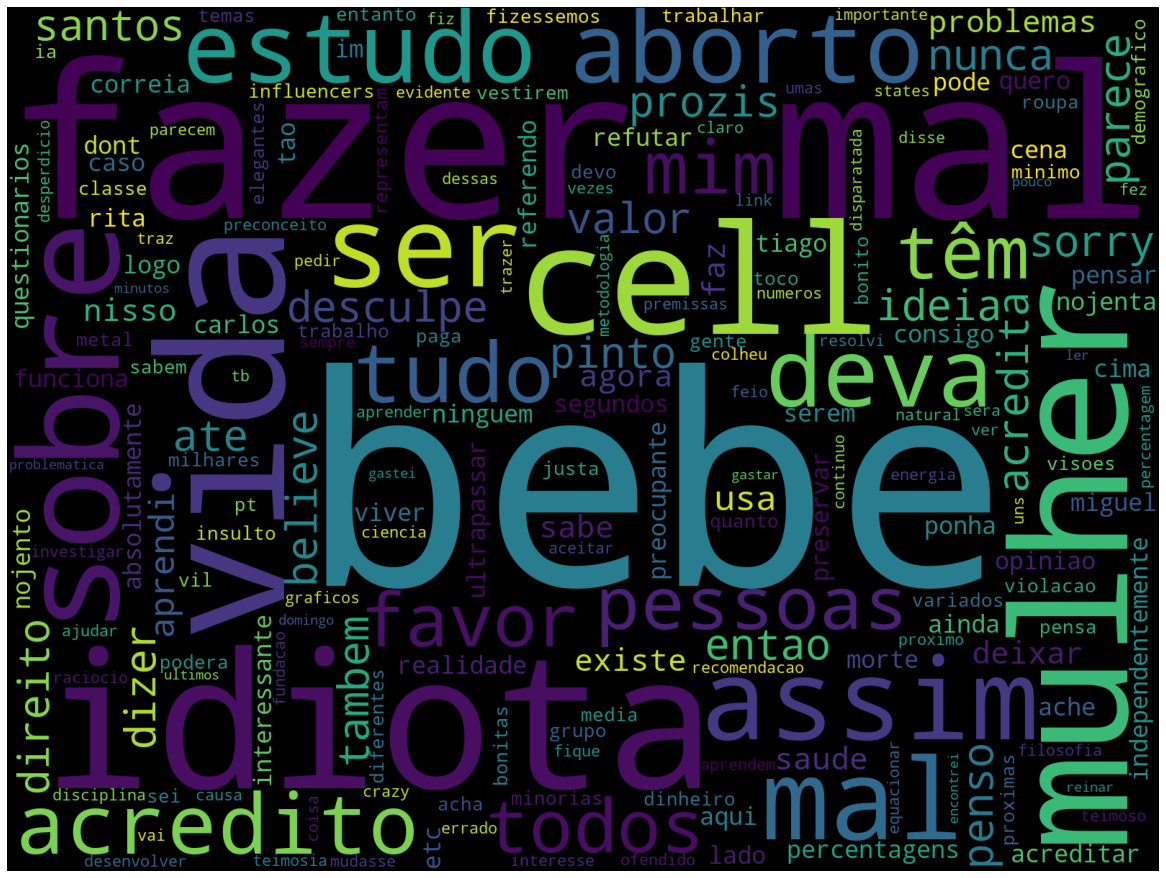

In [23]:
mm = name_activity["miguel milhão"]
print(len(mm))
mm_text = []
for c in mm:
    if c["type"] == "reaction": 
        print(f"reaction {c['content']['reaction']}")
        continue
    mm_text.append(c["content"]["comment"])
mm_text = "\n".join(mm_text)
do_word_cloud(mm_text, ["luís", "gama", "hugo", "couto", "acho", "sao"], "mm.png")

In [18]:
print(Counter([r["reaction"] for r in ORIGINAL_COMMENT["reactions"]]))

Counter({'like': 228, 'maybe': 54, 'empathy': 27, 'praise': 14, 'entertainment': 14, 'appreciation': 10})


In [19]:
positive_reactions = {"entertainment": False, "like": True, "empathy": True, "praise": True, "maybe": False, "appreciation": True, "interest": True}

In [20]:
# favor vs against
FAVOR, AGAINST = set(), set()

In [21]:
for r in ORIGINAL_COMMENT["reactions"]:
    if positive_reactions[r["reaction"]]:
        key = get_key(r)
        FAVOR.add(key)
        if key not in people: print(f'{key} not in people')
        people[key]["favor_orig"]=1
print(f'{len(FAVOR)}/{len(ORIGINAL_COMMENT["reactions"])} ({100 * len(FAVOR)/len(ORIGINAL_COMMENT["reactions"])}%)')

279/347 (80.40345821325649%)


In [22]:
# generates a lot of false positives
REACT_IN_FAVOR = set()
for a in name_activity["miguel milhão"]:
    if a["type"] == "reaction": continue
    for r in a["content"]["reactions"]:
        if positive_reactions[r["reaction"]]:
            key = get_key(r)
            REACT_IN_FAVOR.add(key)
            if key not in people: print(f'{key} not in people')
            people[key]["favor_react"]=1
print(f'{len(REACT_IN_FAVOR)=}')
print(f'{len(REACT_IN_FAVOR - FAVOR)=}')

len(REACT_IN_FAVOR)=184
len(REACT_IN_FAVOR - FAVOR)=135


In [23]:
# manually checked each
outliers = set(["E eu sou a favor de vasectomia obrigatória para quem discorre neste tipo de diarreia mental nas redes."])
def is_post_in_favor(p):
    return get_key(p) in FAVOR

new_in_favor = set()

print(f'{len(FAVOR)=}')
posts_by_in_favor = []
for c in comments:
    if is_post_in_favor(c):
        if c["comment"] not in outliers:
            # print(f'"{c["comment"]}"')
            # print(c["url"])
            posts_by_in_favor.append(c)
            for r in c["reactions"]:
                if positive_reactions[r["reaction"]]:
                    new_in_favor.add(get_key(r))
        
    for r in c["replies"]:
        if is_post_in_favor(r):
            # print(r["comment"])
            # print(r["url"])
            posts_by_in_favor.append(c)
            for rr in r["reactions"]:
                if positive_reactions[rr["reaction"]]:
                    new_in_favor.add(get_key(rr))

print(f'{len(posts_by_in_favor)=}')
print(f'{len(FAVOR | new_in_favor)=}')


len(FAVOR)=279
len(posts_by_in_favor)=18
len(FAVOR | new_in_favor)=302


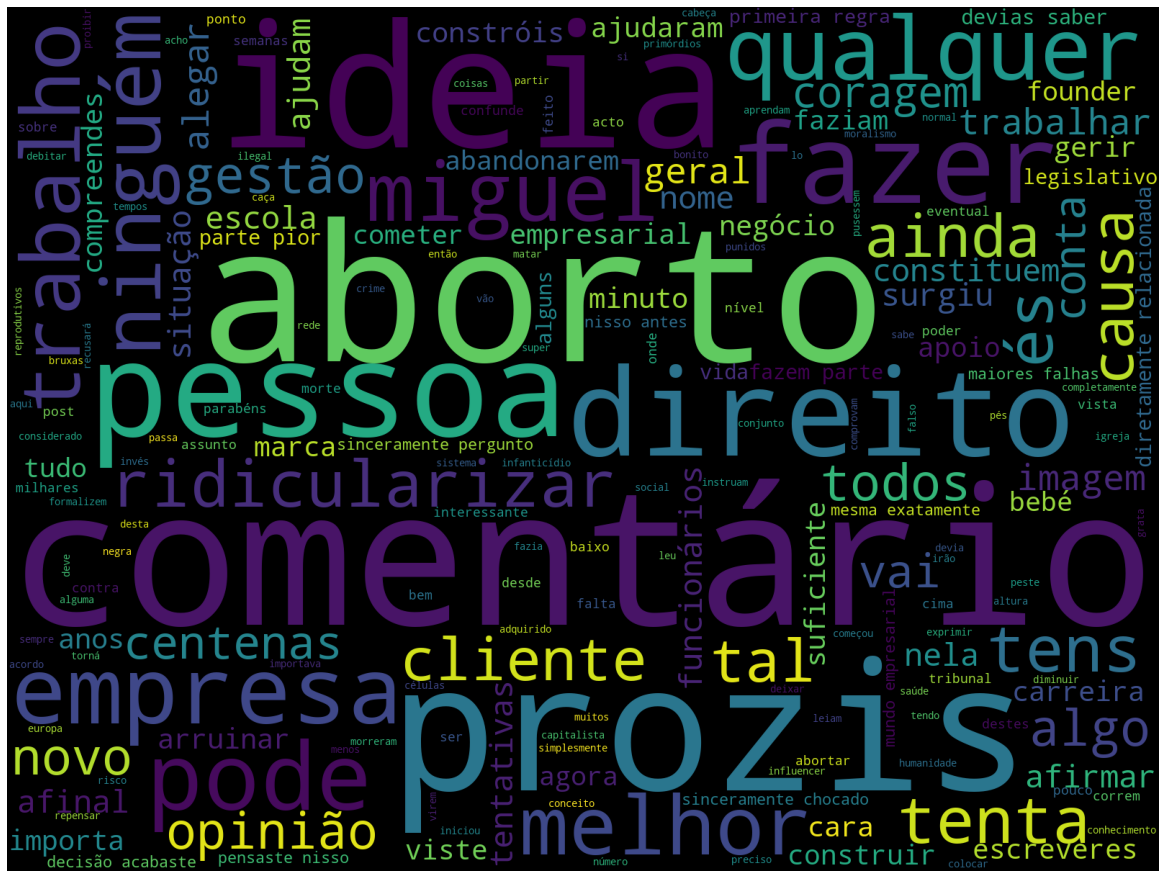

In [30]:
# prolife wordcloud
prolife_text = " ".join([p["comment"] for p in posts_by_in_favor])
do_word_cloud(prolife_text, ["todo"], save_as="prolife.png")

In [24]:
prolife_gender = defaultdict(int)
prolife_from_reacts = (FAVOR | new_in_favor | REACT_IN_FAVOR)
for prolife in prolife_from_reacts:
    if prolife not in people: print(f'{key} not in people')
    prolife_gender[people[prolife]["name_gender"]]+=1
prolife_gender

for name_gender in prolife_gender.keys():
    # print(f'{name_gender:10s}: prolife = {prolife_gender[name_gender]}/{len(prolife_from_reacts)} aka {100*prolife_gender[name_gender]/len(prolife_from_reacts):.2f}% vs {100*prolife_gender[name_gender]/gender_count[name_gender]:.2f}% for all names')
    print(f'{prolife_gender[name_gender]}/{len(prolife_from_reacts)} aka {100*prolife_gender[name_gender]/len(prolife_from_reacts):.2f}% of prolife are {name_gender}, they are {gender_count[name_gender]}/{len(people)} aka {100*gender_count[name_gender]/len(people):.2f}% of all people')

261/427 aka 61.12% of prolife are male, they are 1194/3106 aka 38.44% of all people
161/427 aka 37.70% of prolife are female, they are 1905/3106 aka 61.33% of all people
5/427 aka 1.17% of prolife are other, they are 7/3106 aka 0.23% of all people


In [25]:
sns.set_style("darkgrid")
# sns.set_style()

In [26]:
data = []
prolife_from_reacts = (FAVOR | new_in_favor | REACT_IN_FAVOR)
for p in people:
    if people[p]["name_gender"] == "other": continue # very few cases
    position = "pro-life" if p in prolife_from_reacts else "pro-choice"
    data.append({"name_gender": people[p]["name_gender"],"position": position})

df = pd.DataFrame(data)
df

,name_gender,position
0,female,pro-choice
1,female,pro-choice
2,female,pro-choice
3,male,pro-choice
4,female,pro-choice
...,...,...
3094,male,pro-life
3095,male,pro-life
3096,female,pro-life
3097,male,pro-life


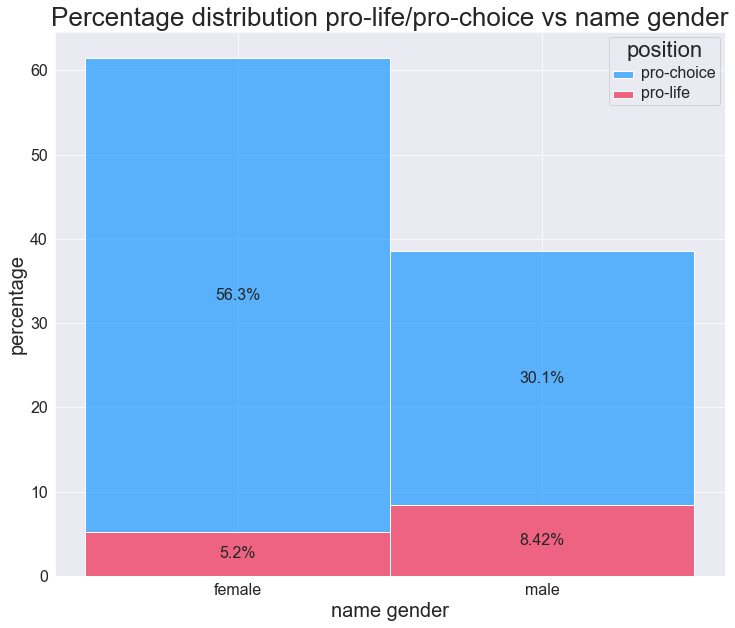

In [28]:
f = plt.figure(figsize=(12, 10))
ax = f.add_subplot(1, 1, 1)
# ['count', 'frequency', 'density', 'probability', 'proportion', 'percent']
sns.histplot(data=df,
             multiple="stack",
             stat="percent",
             x="name_gender",
             hue="position",
             kde=False,
             palette=["#299fff", "#f0355d"],
             element="bars", legend=True)
ax.set_title("Percentage distribution pro-life/pro-choice vs name gender", fontsize=26)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
for container in ax.containers:
    ax.bar_label(container, fontsize=16, label_type="center", fmt="%.3g%%")
    # ax.bar_label(container, fontsize=16, label_type="center", fmt="%g")
# ax.legend(loc='best', fontsize=20
plt.setp(ax.get_legend().get_texts(), fontsize='16')  # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='22')  # for legend title
ax.set_xlabel("name gender", fontsize=20)
ax.set_ylabel("percentage", fontsize=20)
plt.savefig("media/position_gender.png")


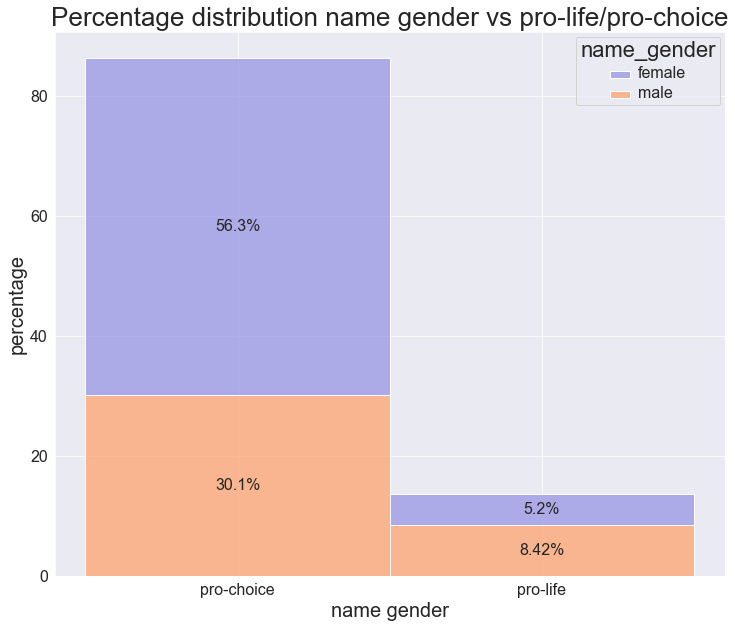

In [31]:
f = plt.figure(figsize=(12, 10))
ax = f.add_subplot(1, 1, 1)
# ['count', 'frequency', 'density', 'probability', 'proportion', 'percent']
sns.histplot(data=df,
             multiple="stack",
             stat="percent",
             x="position",
             hue="name_gender",
             kde=False,
             palette=["#9796e5", "#ffa470"],
             element="bars", legend=True)
ax.set_title("Percentage distribution name gender vs pro-life/pro-choice", fontsize=26)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
for container in ax.containers:
    ax.bar_label(container, fontsize=16, label_type="center", fmt="%.3g%%")
    # ax.bar_label(container, fontsize=16, label_type="center", fmt="%g")
# ax.legend(loc='best', fontsize=20)
plt.setp(ax.get_legend().get_texts(), fontsize='16')  # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='22')  # for legend title
ax.set_xlabel("name gender", fontsize=20)
ax.set_ylabel("percentage", fontsize=20)
plt.savefig("media/gender_position.png")


In [35]:
for key in people:
    people[key]["prochoice"] = key not in prolife_from_reacts

In [36]:
# calculation of reactions vs position and name gender
prolife_repeats = []
prochoice_repeats = []
for k,v in key_activity.items():
    if k in prolife_from_reacts:
        prolife_repeats.extend(len(v) * [people[k]["name_gender"]])
        # prolife_repeats.extend(len(v) * [people[k]["name"]]) # names of most active people
    else:
        prochoice_repeats.extend(len(v) * [people[k]["name_gender"]])
        # prochoice_repeats.extend(len(v) * [people[k]["name"]]) # names of most active people
# print("prolife   activity: ", Counter(prolife_repeats).most_common(25))
# print("prochoice activity: ", Counter(prochoice_repeats).most_common(25))
for name_gender, count in Counter(prolife_repeats).most_common(10):
    print(f'prolife   {name_gender} = {count}/{len(prolife_repeats)} = {100*count/len(prolife_repeats):.2f}%')
print("")
for name_gender, count in Counter(prochoice_repeats).most_common(10):
    print(f'prochoice {name_gender} = {count}/{len(prochoice_repeats)} = {100*count/len(prochoice_repeats):.2f}%')

prolife   male = 1091/1749 = 62.38%
prolife   female = 657/1749 = 37.56%
prolife   other = 1/1749 = 0.06%

prochoice female = 7209/9833 = 73.31%
prochoice male = 2622/9833 = 26.67%
prochoice other = 2/9833 = 0.02%


In [37]:
jobs = {"title": [], "org": []}
stats = {"total_reactions_comments": 0, "total_reactions_replies": 0, "total_replies": 0, "total_people": [], "total_text": []}
for comment in comments:
    # stats["total_replies"]+=len(comment["replies"])
    # stats["total_people"].append(clean_name(comment["name"]))
    # stats["total_reactions_comments"]+=len(comment["reactions"])
    stats["total_text"].append(comment["comment"])
    # for r in comment["reactions"]:
        # stats["total_people"].append(clean_name(r["name"]))
        # title, org = get_job_org(r["job_title"])
        # jobs["title"].append(title)
        # jobs["org"].append(org)
    for r in comment["replies"]:
        # stats["total_reactions_replies"]+=len(r["reactions"])
        # stats["total_people"].append(clean_name(r["name"]))
        stats["total_text"].append(r["comment"])
        # title, org = get_job_org(r["job_title"])
        # jobs["title"].append(title)
        # jobs["org"].append(org)
    # for r in ORIGINAL_COMMENT["reactions"]: todo(r)
    
# stats["total_people"] = len(set(stats["total_people"]))
total_text = " ".join(stats["total_text"])
stats["total_text"] = sum([len(t) for t in stats["total_text"]])
print(stats)

{'total_reactions_comments': 0, 'total_reactions_replies': 0, 'total_replies': 0, 'total_people': [], 'total_text': 136293}


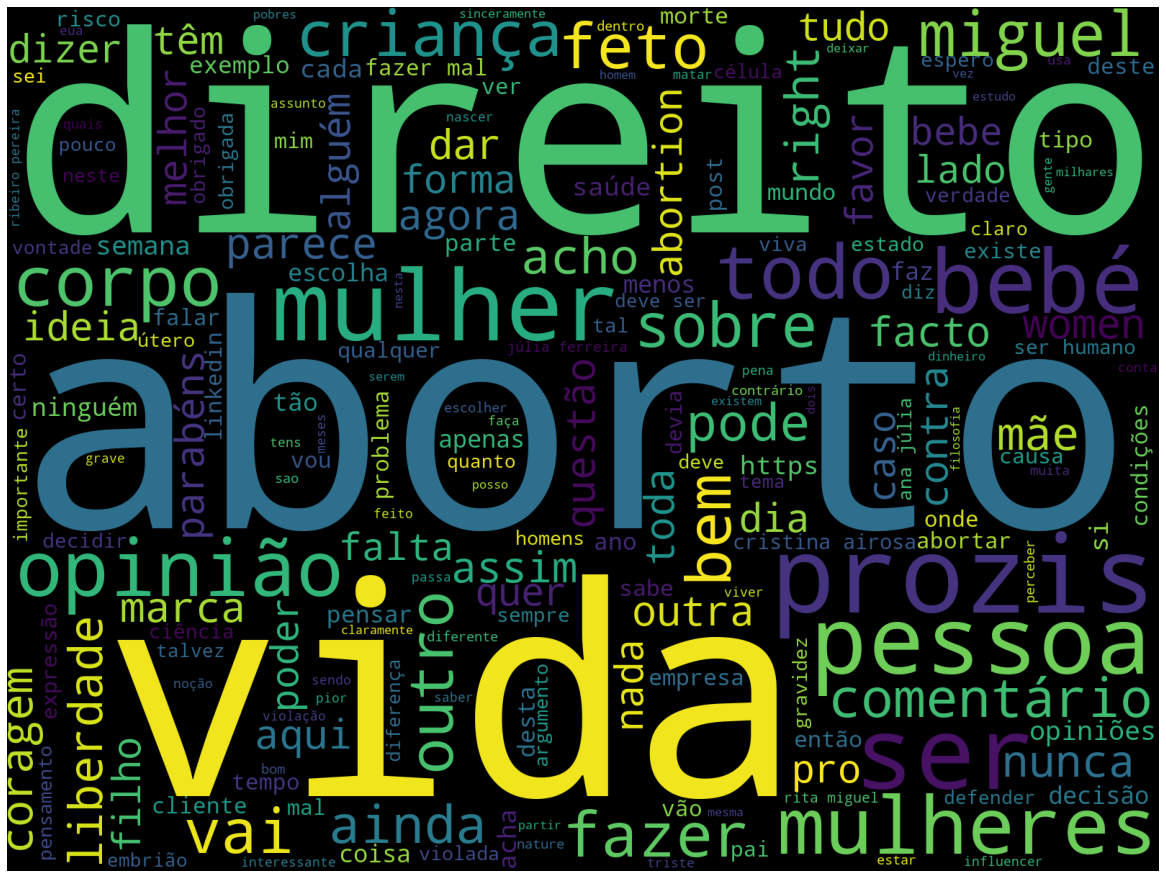

In [38]:
do_word_cloud(total_text, save_as="all.png")

In [40]:
import re
urls = re.findall('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', total_text)

print(len(urls))
print(urls)

26
['https://www.spdc.pt/images/RelatrioIVG2018_Imprensa.pdf.', 'https://www.pewresearch.org/religion/fact-sheet/public-opinion-on-abortion/', 'https://www.pewresearch.org/religion/fact-sheet/public-opinion-on-abortion/mulheres', 'https://www.pewresearch.org/religion/2022/05/06/americas-abortion-quandary/', 'https://instagram.com/martamelroblackbird?igshid=YmMyMTA2M2Y=', 'https://expresso.pt/opiniao/2022-06-27-Sou-catolico-o-fim-do-Roe-vs.-Wade-e-um-avanco-da-morte-nao-da-vida-41d86801', 'https://www.rtp.pt/play/p9874/linha-da-frente', 'https://www.bbc.com/news/uk-england-merseyside-60714093.amp', 'https://www.publico.pt/2021/06/22/mundo/noticia/violacoes-graves-criancas-conflitos-sao-assustadoramente-altas-alerta-onu-1967445', 'https://postimg.cc/LgktFy07', 'https://www.msdmanuals.com/', 'https://www.instagram.com/tv/CeuL7R8rjKM/?igshid=YmMyMTA2M2Y=', 'https://observador.pt/2022/06/24/menina-brasileira-autorizada-a-abortar-apos-polemica-crianca-ficou-gravida-devido-a-violacao/', 'http

### Graph

In [41]:
nx.__version__

'2.8.4'

In [42]:
# 1st reactions graph: people are nodes, reactions are edges
G = nx.DiGraph()

In [43]:
# add notes with key, gender, and prochoice status (T/F)
for key in people: 
    G.add_node(key)
    nx.set_node_attributes(G, {key: people[key]["name_gender"]}, name="name_gender")
    nx.set_node_attributes(G, {key: people[key]["prochoice"]}, name="prochoice")
    nx.set_node_attributes(G, {key: key==get_key(ORIGINAL_COMMENT)}, name="mm")
f'{len(G.nodes)} nodes'

'3106 nodes'

In [44]:
# add edges
edge_occr = []
for c in comments:
    c_key = get_key(c)
    for r in c["reactions"]:
        r_key = get_key(r)
        G.add_edge(r_key, c_key)  # reaction to comment
        edge_occr.append((r_key, c_key))
        nx.set_edge_attributes(G, {(r_key, c_key): {"reaction": r["reaction"]}})
    for r in c["replies"]:
        r_key = get_key(r)
        # G.add_edge(r_key, c_key) # reply to comment not included
        # nx.set_edge_attributes(G, {(r_key, c_key): {"reaction": r["reaction"]}})
        for rr in r["reactions"]:
            rr_key = get_key(rr)
            G.add_edge(rr_key, r_key)  # reaction to reply
            edge_occr.append((rr_key, r_key))
            nx.set_edge_attributes(G, {(rr_key, r_key): {"reaction": rr["reaction"]}})

mm_key = get_key(ORIGINAL_COMMENT)
for r in ORIGINAL_COMMENT["reactions"]:
    r_key = get_key(r)
    G.add_edge(r_key, mm_key)  # reaction to reply
    edge_occr.append((r_key, mm_key))
    nx.set_edge_attributes(G, {(r_key, mm_key): {"reaction": r["reaction"]}})
for edge, weight in Counter(edge_occr).items():
    G.add_edge(edge[0],edge[1],weight=weight)
f'{len(G.edges)} edges'

'9844 edges'

In [45]:
for self_react in nx.nodes_with_selfloops(G):
    print(f'{people[self_react]["prochoice"]=}')

people[self_react]["prochoice"]=False


In [46]:
# for after analysis
nx.write_gexf(G, "mm-27.gexf")